# Data statistics : Done by : Abhishek Subedi & Anusha Bora

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
import numpy as np

In [5]:
from IPython.display import display, HTML
css = """.output {flex-direction: row;}"""
HTML('<style>{}</style>'.format(css))

In [6]:
!ls

1.data_information_graphics_&_comics.ipynb
1.data_information_mystery_thriller_crime.ipynb
3D_visualization_both_genre.ipynb
RQ1.ipynb
RQ2.ipynb
RQ3_both_genre.ipynb
RQ4_Comics_Graphics.ipynb
RQ4_Mystery_Thriller_Crime.ipynb
Word clouds.ipynb
books_interactions_final.json
books_interactions_thriller.json
books_metadata_comics.json
books_metadata_thriller.json
books_review_comics_final.json
books_review_thriller.json
final_dataset
readme.rtf
statistics-crime_thriller.ipynb
statistics_comics_graphics.ipynb


__Read all the files__

In [ ]:
books_metadata = pd.read_json('books_metadata_thriller.json')
books_interactions = pd.read_json('books_interactions_thriller.json')
books_reviews = pd.read_json('books_review_thriller.json')

In [3]:
books_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66315 entries, 1 to 103407
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text_reviews_count  66315 non-null  int64  
 1   language_code       66315 non-null  object 
 2   popular_shelves     66315 non-null  object 
 3   is_ebook            66315 non-null  object 
 4   average_rating      66315 non-null  float64
 5   description         66315 non-null  object 
 6   authors             66315 non-null  object 
 7   publication_year    66315 non-null  int64  
 8   book_id             66315 non-null  int64  
 9   ratings_count       66315 non-null  int64  
 10  work_id             66315 non-null  int64  
 11  title               66315 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 6.6+ MB


In [4]:
books_metadata.head()

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title
1,3,eng,"[{'count': '1694', 'name': 'mystery'}, {'count...",false,3.96,Agatha Christie's most ingenious murder myster...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158998,5,2288775,A Murder is Announced
2,6,eng,"[{'count': '171', 'name': 'to-read'}, {'count'...",false,4.14,"""Poetic, down trodden and nihilistic, Jonathan...","[{'author_id': '4577517', 'role': ''}]",2014,22722787,18,42251489,The Cost of Doing Business
3,2,eng,"[{'count': '1642', 'name': 'mystery'}, {'count...",false,3.93,In Agatha Christie's classic mystery 4:50 From...,"[{'author_id': '123715', 'role': ''}, {'author...",2013,16158996,5,6490729,4:50 From Paddington
4,46,eng,"[{'count': '328', 'name': 'mystery'}, {'count'...",false,4.07,Past and present collide as Special Agent Pend...,"[{'author_id': '12577', 'role': ''}, {'author_...",2013,17368265,250,24152432,"White Fire (Pendergast, #13)"
5,4,eng,"[{'count': '5396', 'name': 'to-read'}, {'count...",false,4.11,1 MP3-CD / 10 hours\nHaunted by a series of ho...,"[{'author_id': '25108', 'role': ''}, {'author_...",2004,926660,15,911663,Monkeewrench


In [5]:
books_metadata[books_metadata['title']=='Watchmen']

,text_reviews_count,language_code,popular_shelves,is_ebook,average_rating,description,authors,publication_year,book_id,ratings_count,work_id,title


__column names__

In [6]:
bmc = pd.DataFrame(books_metadata.columns)
bmc

,0
0,text_reviews_count
1,language_code
2,popular_shelves
3,is_ebook
4,average_rating
5,description
6,authors
7,publication_year
8,book_id
9,ratings_count


__Average of average rating__

In [7]:
average = books_metadata['average_rating'].sum()
average_rating = average/66315
average_rating

3.872683254165724

__Unique books number__

In [8]:
len(books_metadata['book_id'].unique())

66315

__Ebook vs hardcopy__

In [9]:
is_ebook = len(books_metadata[books_metadata['is_ebook']=='true'])
not_ebook = len(books_metadata[books_metadata['is_ebook']=='false'])
print('is_ebook :', is_ebook, "not_ebook :",not_ebook )

is_ebook : 17517 not_ebook : 48798


__Frequency distribution of average_rating__

<AxesSubplot:title={'center':'Crime & Thriller'}, xlabel='average_rating', ylabel='count'>

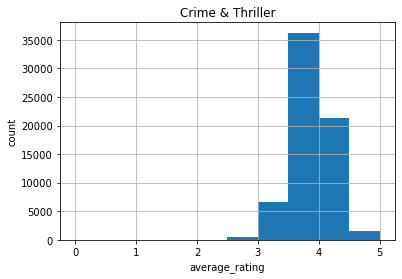

In [10]:
plt.figure()
plt.title("Crime & Thriller")
plt.ylabel('count')
plt.xlabel('average_rating')
books_metadata['average_rating'].hist()

__Frequency distribution of books over time__

In [11]:
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 13, value = 1981)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 2105, value = 2007)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 201, value = 2015)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 207, value = 2016)
books_metadata['publication_year'] = books_metadata['publication_year'].replace(to_replace = 1016, value = 2016)

/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uni/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


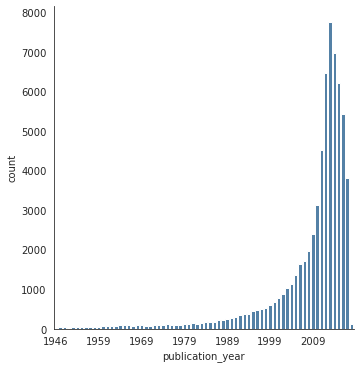

In [13]:
with sn.axes_style('white'):
    g = sn.factorplot("publication_year", data = books_metadata, aspect=1,
                     kind='count', color='steelblue')
    g.set_xticklabels(step=10)

__Oldest and latest publication year__

In [14]:
oldest = books_metadata['publication_year'].min()
latest = books_metadata['publication_year'].max()
print('oldest : ', oldest)
print('newest : ', latest)

oldest :  1946
newest :  2018


In [15]:
books_interactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15045017 entries, 0 to 15045016
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   index         int64 
 1   user_id       object
 2   book_id       int64 
 3   review_id     object
 4   is_read       bool  
 5   rating        int64 
 6   date_added    object
 7   date_updated  object
dtypes: bool(1), int64(3), object(4)
memory usage: 932.6+ MB


In [16]:
books_interactions.head()

,index,user_id,book_id,review_id,is_read,rating,date_added,date_updated
0,2,8842281e1d1347389f2ab93d60773d4d,20821043,4b15f8a08f04a17f9a47f2b76fec21e5,False,0,Mon Mar 27 22:52:11 -0700 2017,Mon Mar 27 22:52:12 -0700 2017
1,3,8842281e1d1347389f2ab93d60773d4d,31184479,0b9fc382ad38c5804ec46df84d66be6e,False,0,Fri Jan 06 16:22:46 -0800 2017,Fri Jan 06 16:22:46 -0800 2017
2,4,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,True,3,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017
3,5,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,False,0,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016
4,6,8842281e1d1347389f2ab93d60773d4d,17288661,62083867d5baac6f82ebea10ae5a2843,False,0,Mon Jul 11 21:46:06 -0700 2016,Mon Jul 11 21:46:06 -0700 2016


__interactions columns__

In [17]:
bic = pd.DataFrame(books_interactions.columns)
bic

,0
0,index
1,user_id
2,book_id
3,review_id
4,is_read
5,rating
6,date_added
7,date_updated


In [18]:
books_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056240 entries, 0 to 1056239
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   index         1056240 non-null  int64 
 1   user_id       1056240 non-null  object
 2   book_id       1056240 non-null  int64 
 3   review_id     1056240 non-null  object
 4   rating        1056240 non-null  int64 
 5   review_text   1056240 non-null  object
 6   date_added    1056240 non-null  object
 7   date_updated  1056240 non-null  object
 8   read_at       1056240 non-null  object
 9   n_votes       1056240 non-null  int64 
 10  n_comments    1056240 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 96.7+ MB


In [19]:
books_reviews.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,22,0
1,2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,9,0
2,3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,7,0
3,4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,17,6
4,6,8842281e1d1347389f2ab93d60773d4d,2429135,efee7a3f620ed640366226caa7b138f0,5,I haven't stayed up until 5am to finish a book...,Mon Mar 15 14:05:04 -0700 2010,Wed Mar 22 11:46:43 -0700 2017,Sun Mar 28 00:00:00 -0700 2010,13,10


__reviews columns__

In [20]:
brc = pd.DataFrame(books_reviews.columns)
brc

,0
0,index
1,user_id
2,book_id
3,review_id
4,rating
5,review_text
6,date_added
7,date_updated
8,read_at
9,n_votes


In [21]:
len(books_reviews['book_id'].unique())

66266

__Data cleaning__

In [22]:
books_reviews['review_text'] = books_reviews['review_text'].str.lower()

In [23]:
#remove punctuations
#remove all non alphabetic characters
regex_1 = re.compile(r'[^a-zA-Z]')
books_reviews['review_text'] = pd.Series(books_reviews['review_text']).str.replace(regex_1, ' ')

In [24]:
#reduce multi-space to single space
regex_2 = re.compile(r' +')
books_reviews['review_text'] = pd.Series(books_reviews['review_text']).str.replace(regex_2,' ')

In [25]:
books_reviews['review_text']

0          a fun fast paced science fiction thriller i re...
1                          http www telegraph co uk culture 
2          an amazing and unique creation jj abrams and d...
3          the name of the rose is a thrilling dan brown ...
4          i haven t stayed up until am to finish a book ...
                                 ...                        
1056235    infernal gates by michael webb centers on etha...
1056236    in addition to providing excellent medical adv...
1056237    while young cate kincaid has no experience as ...
1056238    are you a suspense fan do you crave action and...
1056239    i m not a regular mystery reader however this ...
Name: review_text, Length: 1056240, dtype: object

In [26]:
books_reviews['word_count'] = books_reviews['review_text'].apply(lambda x: len(x.strip().split()))

In [27]:
books_reviews.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments,word_count
0,1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,a fun fast paced science fiction thriller i re...,Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,22,0,471
1,2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http www telegraph co uk culture,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,9,0,6
2,3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,an amazing and unique creation jj abrams and d...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,7,0,480
3,4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,the name of the rose is a thrilling dan brown ...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,17,6,381
4,6,8842281e1d1347389f2ab93d60773d4d,2429135,efee7a3f620ed640366226caa7b138f0,5,i haven t stayed up until am to finish a book ...,Mon Mar 15 14:05:04 -0700 2010,Wed Mar 22 11:46:43 -0700 2017,Sun Mar 28 00:00:00 -0700 2010,13,10,42


__describe the word_count column__

In [28]:
books_reviews['word_count'].describe()

count    1.056240e+06
mean     1.188126e+02
std      1.600938e+02
min      0.000000e+00
25%      2.300000e+01
50%      6.100000e+01
75%      1.490000e+02
max      3.956000e+03
Name: word_count, dtype: float64

__plot review length with respect to review count__

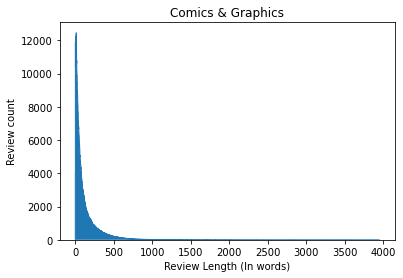

In [29]:
plt.xlabel('Review Length (In words)')
plt.ylabel('Review count')
plt.title('Comics & Graphics')
plt.hist(books_reviews['word_count'], bins=np.arange(max(books_reviews['word_count'])), histtype='step', linewidth=1, fill=True);